# Length distributions equalization

Create datasets with equal numbers of good and bad jokes. Also distributions of jokes length (number of words) forsed to be the same. So there should be no direct dependence on joke length.

In [47]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Load datasets
an_jokes = []
for i in range(3):
    an_jokes += json.loads(open('..\\data\\processed\\an_ru{}.json'.format(i), 'r', encoding = 'utf-8').read())
bash_jokes = json.loads(open('..\\data\\processed\\bash_jokes.json', 'r', encoding = 'utf-8').read())

Good jokes tend to be longer. One can see it from average lengths and histogramms:

Average length
    good anecdotes:   33.53
    bad anecdotes:    27.00
    good bash quotes: 46.41
    bad bash quotes:  33.26


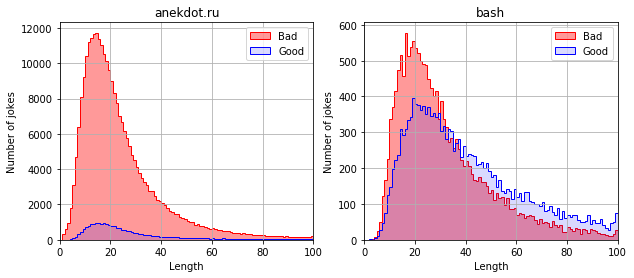

In [49]:
an_good_lengths   = np.array([len(a[0].split()) for a in an_jokes if a[-1]])
an_bad_lengths    = np.array([len(a[0].split()) for a in an_jokes if not a[-1]])
bash_good_lengths = np.array([len(b[0].split()) for b in bash_jokes if b[-1]])
bash_bad_lengths  = np.array([len(b[0].split()) for b in bash_jokes if not b[-1]])

def ShowLengthsHistogramm(good_lengths, bad_lengths, label = ""):
    n,bins,patches = plt.hist(bad_lengths, bins = 100, range = (0,100), histtype = 'stepfilled',
                              color = (1,0,0,0.4), edgecolor = 'r');
    n,bins,patches = plt.hist(good_lengths, bins = 100, range = (0,100), histtype = 'stepfilled', 
                              color = (0,0,1,0.15), edgecolor = 'b');
    plt.grid()
    plt.xlim((0, 100))
    #plt.ylim((0, 12000))
    plt.xlabel('Length')
    plt.ylabel('Number of jokes')
    plt.legend(['Bad', 'Good'])
    plt.title(label)

# Histogramms before equalization
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
ShowLengthsHistogramm(an_good_lengths, an_bad_lengths, "anekdot.ru")
plt.subplot(1,2,2)
ShowLengthsHistogramm(bash_good_lengths, bash_bad_lengths, "bash")

print("""Average length\n    good anecdotes:   {:.2f}\n    bad anecdotes:    {:.2f}
    good bash quotes: {:.2f}\n    bad bash quotes:  {:.2f}""".format(
    np.mean(an_good_lengths), np.mean(an_bad_lengths), 
    np.mean(bash_good_lengths), np.mean(bash_bad_lengths)))


Let's create datasets with equal lengths distributions for good and bad jokes. We sort jokes according lengths, then divide sorted arrays into 50 parts and randomly choose equal number of jokes in each part.

In [50]:
def SameLength(x, y):
    """Remove elements from longer array so both arrays have the same length"""
    Nx, Ny = len(x), len(y)
    n_min = min(Nx, Ny)
    rnd_x = np.arange(Nx)
    np.random.shuffle(rnd_x)
    rnd_y = np.arange(Ny)
    np.random.shuffle(rnd_y)
    if len(x) < len(y):
        y = [y[k] for k in rnd_y[:n_min]]
    else:
        x = [x[k] for k in rnd_x[:n_min]]
    return x, y
        
def EqualizeLengths(jokes, num_of_parts = 200):
    N = len(jokes)
    lengths = np.array([len(a[0].split()) for a in jokes])
    idx = lengths.argsort()
    
    jokes_eq = []
    for i in range(num_of_parts):
        p_beg = int(i * N / num_of_parts)
        p_end = min(int(p_beg + N / num_of_parts), N)
        p_good, p_bad = [], []
        for k in range(p_beg, p_end):
            joke = jokes[idx[k]]
            is_good = joke[-1]
            if is_good:
                p_good.append(joke)
            else:
                p_bad.append(joke)
        p_good, p_bad = SameLength(p_good, p_bad)
        jokes_eq += p_good + p_bad
    
    return jokes_eq
    

an_jokes_eq = EqualizeLengths(an_jokes)
bash_jokes_eq = EqualizeLengths(bash_jokes)

Average length
    good anecdotes:   33.53
    bad anecdotes:    34.04
    good bash quotes: 37.20
    bad bash quotes:  37.19

 24124 24124 13913 13913


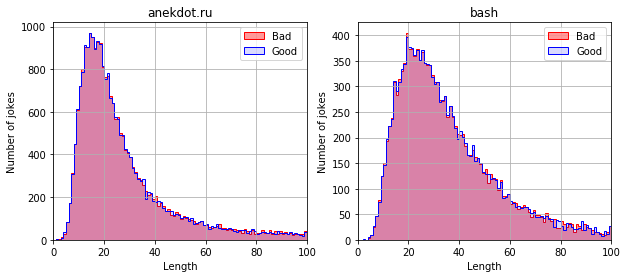

In [51]:
# Histogramms after equalization
an_good_lengths   = np.array([len(a[0].split()) for a in an_jokes_eq if a[-1]])
an_bad_lengths    = np.array([len(a[0].split()) for a in an_jokes_eq if not a[-1]])
bash_good_lengths = np.array([len(b[0].split()) for b in bash_jokes_eq if b[-1]])
bash_bad_lengths  = np.array([len(b[0].split()) for b in bash_jokes_eq if not b[-1]])

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
ShowLengthsHistogramm(an_good_lengths, an_bad_lengths, "anekdot.ru")
plt.subplot(1,2,2)
ShowLengthsHistogramm(bash_good_lengths, bash_bad_lengths, "bash")

print("""Average length\n    good anecdotes:   {:.2f}\n    bad anecdotes:    {:.2f}
    good bash quotes: {:.2f}\n    bad bash quotes:  {:.2f}""".format(
    np.mean(an_good_lengths), np.mean(an_bad_lengths), 
    np.mean(bash_good_lengths), np.mean(bash_bad_lengths)))

print("\n", len(an_good_lengths), len(an_bad_lengths), len(bash_good_lengths), len(bash_bad_lengths))



In [52]:
f = open('..\\data\\processed\\an_jokes_eq.json', 'w', encoding = 'utf-8')
f.write(json.dumps(an_jokes_eq, ensure_ascii = False))
f.close()
f = open('..\\data\\processed\\bash_jokes_eq.json', 'w', encoding = 'utf-8')
f.write(json.dumps(bash_jokes_eq, ensure_ascii = False))
f.close()